<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Dhiya' Ulhaq Ulayya

NIM   : 2341720021

Kelas : TI - 3A

Modul : 5 - Gamma Correction

# **Praktikum**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Buat Gamma Correction**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


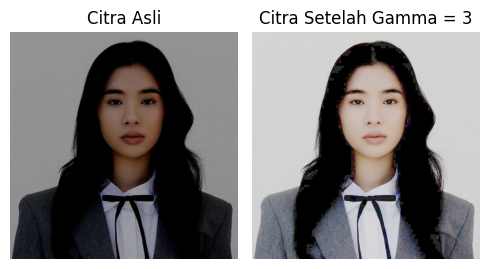

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = '/content/drive/MyDrive/Image PCVK/female.jpeg'

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Citra asli
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan di path yang diberikan.")

# Konversi ke float dan normalisasi 0–1
img_float = img.astype(np.float32) / 255.0

# Menerapkan gamma correction sesuai rumus
gamma_corrected = np.power(img_float, 1.0 / gamma)
gamma_corrected = np.clip(gamma_corrected * 255.0, 0, 255).astype(np.uint8)

# Menampilkan dua gambar
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f'Citra Setelah Gamma = {gamma}')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

**2. Buat Simulasi Image Depth**

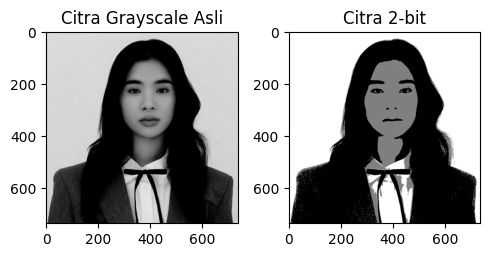

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Gambar grayscale
original = cv2.imread('/content/drive/MyDrive/Image PCVK/female.jpeg', cv2.IMREAD_GRAYSCALE)

# Bit depth yang diinginkan
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Citra hasil dengan ukuran dan tipe sama
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi (reduksi bit depth)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Menampilkan hasil seperti contoh (original dan hasil bit depth 2)
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.title('Citra Grayscale Asli')
plt.imshow(original, cmap='gray')

plt.subplot(1,2,2)
plt.title(f'Citra {bit_depth}-bit')
plt.imshow(depth_image, cmap='gray')

plt.tight_layout()
plt.show()

**3. Buat modul Average Denoising**

In [34]:
cv_img = [1]
for img in glob.glob('/content/drive/MyDrive/Image PCVK/noises/*.jpg'):

    n = cv.imread(img)
    cv_img.append(n)

In [52]:
import cv2
import numpy as np
import os

# Path citra asli (pastikan Galaxy.jpg ada di sini)
src_path = '/content/drive/MyDrive/Image PCVK/Galaxy.jpg'

# Buat folder baru untuk menyimpan hasil noise
dst_dir = '/content/drive/MyDrive/Image PCVK/noises'
os.makedirs(dst_dir, exist_ok=True)

# Baca citra asli (grayscale)
img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)

# Buat 100 citra dengan Gaussian noise
for i in range(1, 101):
    noise = np.random.normal(0, 25, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    cv2.imwrite(f"{dst_dir}/noisy_{i:03d}.jpg", noisy_img)

print("100 gambar noisy telah dibuat di folder:", dst_dir)

100 gambar noisy telah dibuat di folder: /content/drive/MyDrive/Image PCVK/noises



 Average Denoising 
----------------------------------
Total gambar dengan noise: 100


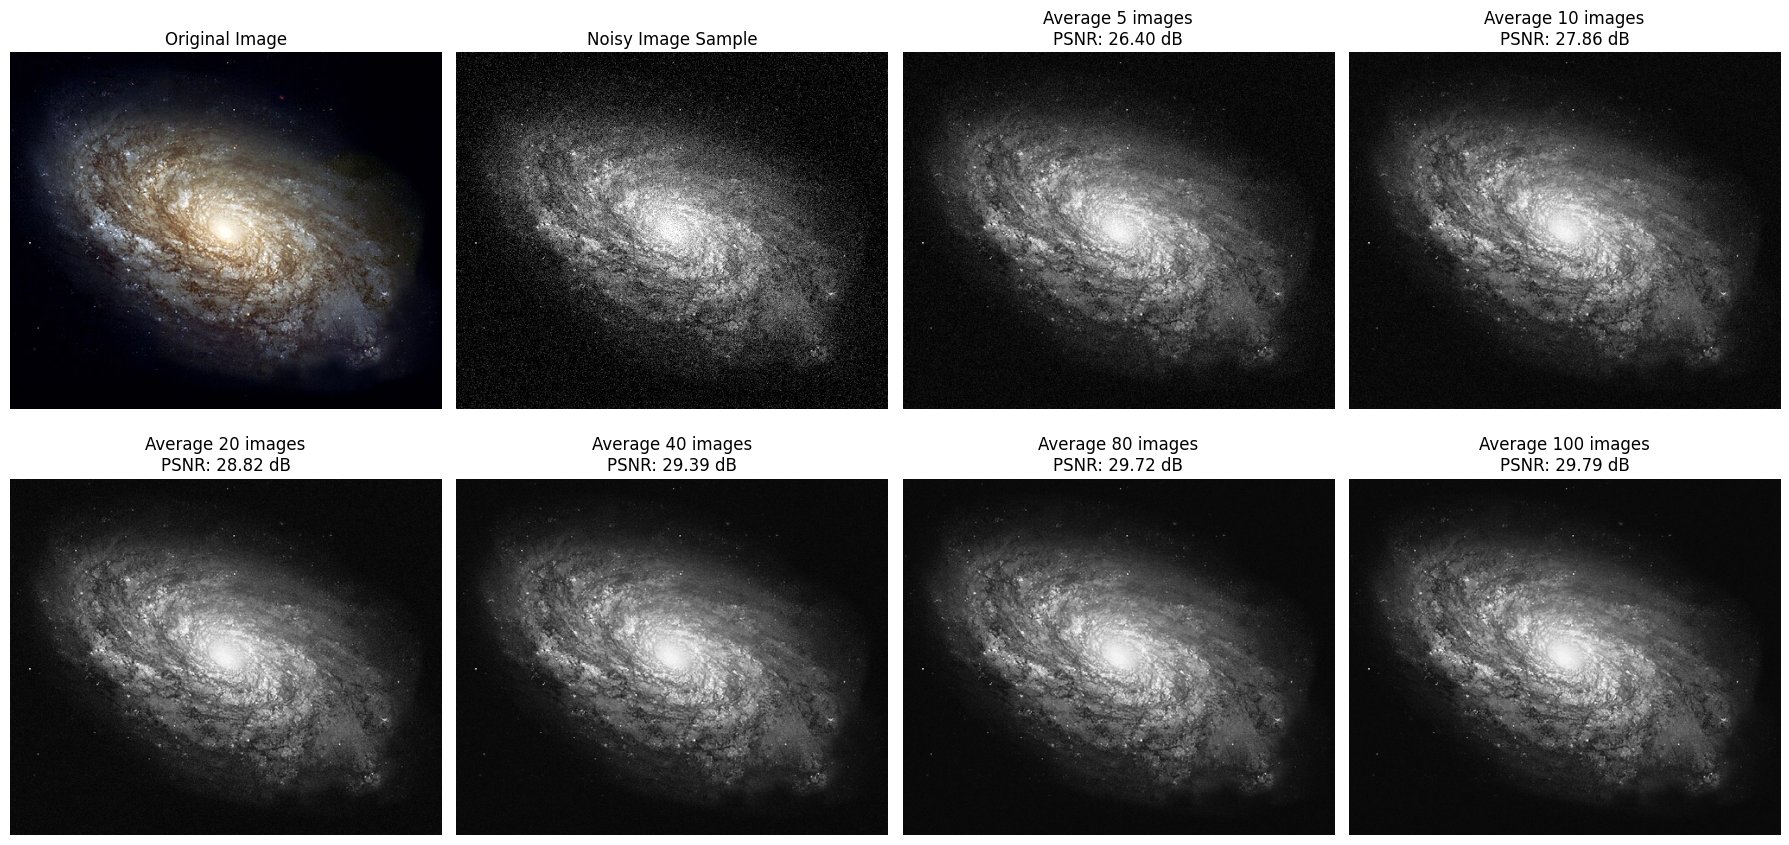


=== Tabel Hasil PSNR ===
No    Jumlah Citra    PSNR (dB)      
----------------------------------------
1     5               26.40          
2     10              27.86          
3     20              28.82          
4     40              29.39          
5     80              29.72          
6     100             29.79          

Kesimpulan:
Semakin banyak jumlah citra yang di-average, semakin tinggi nilai PSNR.
Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.
Noise yang bersifat random akan saling meniadakan ketika dirata-ratakan,
sehingga citra hasil averaging mendekati citra asli.


[{'num_images': 5, 'psnr': 26.40279784093568},
 {'num_images': 10, 'psnr': 27.8629669995808},
 {'num_images': 20, 'psnr': 28.821338281396848},
 {'num_images': 40, 'psnr': 29.394652905822994},
 {'num_images': 80, 'psnr': 29.719780887539304},
 {'num_images': 100, 'psnr': 29.78649023674132}]

In [43]:
import cv2 as cv
import numpy as np
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt

# -------------------------------------------------
# Fungsi PSNR
# -------------------------------------------------
def PSNR(img1, img2):
    """Fungsi untuk menghitung PSNR"""
    mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
    if mse == 0:  # MSE 0 maka tidak ada noise sama sekali
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


# -------------------------------------------------
# Fungsi Average Denoising
# -------------------------------------------------
def average_denoising():
    print('\n Average Denoising ')
    print('----------------------------------')

    # Baca citra asli
    original_path = '/content/drive/MyDrive/Image PCVK/Galaxy.jpg'
    original = cv.imread(original_path)
    if original is None:
        raise FileNotFoundError(f"Gambar asli tidak ditemukan di: {original_path}")

    # Baca semua citra dengan noise
    cv_img = []
    noise_path = '/content/drive/MyDrive/Image PCVK/noises/*.jpg'
    for img in sorted(glob.glob(noise_path)):
        n = cv.imread(img)
        if n is not None:
            cv_img.append(n)

    print(f'Total gambar dengan noise: {len(cv_img)}')
    if len(cv_img) == 0:
        raise FileNotFoundError(f"Tidak ada gambar noise di folder: {noise_path}")

    # Jumlah citra yang akan di-average
    num_images_list = [5, 10, 20, 40, 80, 100]
    results = []

    # Siapkan figure untuk menampilkan hasil
    fig, axes = plt.subplots(2, 4, figsize=(18, 9))
    axes = axes.ravel()

    # Tampilkan original
    axes[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan salah satu noisy image
    axes[1].imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
    axes[1].set_title('Noisy Image Sample')
    axes[1].axis('off')

    # Proses averaging untuk berbagai jumlah citra
    for idx, num_imgs in enumerate(num_images_list, start=2):
        if num_imgs > len(cv_img):
            print(f"⚠️  Jumlah citra ({num_imgs}) melebihi total gambar ({len(cv_img)}). Dilewati.")
            continue

        # Hitung rata-rata
        averaged_img = np.zeros(cv_img[0].shape, dtype=np.float64)
        for i in range(num_imgs):
            averaged_img += cv_img[i].astype(np.float64)

        averaged_img = (averaged_img / num_imgs).astype(np.uint8)

        # Hitung PSNR
        psnr_value = PSNR(original, averaged_img)
        results.append({
            'num_images': num_imgs,
            'psnr': psnr_value
        })

        # Tampilkan hasil
        axes[idx].imshow(cv.cvtColor(averaged_img, cv.COLOR_BGR2RGB))
        axes[idx].set_title(f'Average {num_imgs} images\nPSNR: {psnr_value:.2f} dB')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Cetak tabel hasil
    print('\n=== Tabel Hasil PSNR ===')
    print(f'{"No":<5} {"Jumlah Citra":<15} {"PSNR (dB)":<15}')
    print('-' * 40)
    for i, result in enumerate(results, start=1):
        print(f'{i:<5} {result["num_images"]:<15} {result["psnr"]:<15.2f}')

    print('\nKesimpulan:')
    print('Semakin banyak jumlah citra yang di-average, semakin tinggi nilai PSNR.')
    print('Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.')
    print('Noise yang bersifat random akan saling meniadakan ketika dirata-ratakan,')
    print('sehingga citra hasil averaging mendekati citra asli.')

    return results

# Jalankan fungsi
average_denoising()

**4. Buat image masking**

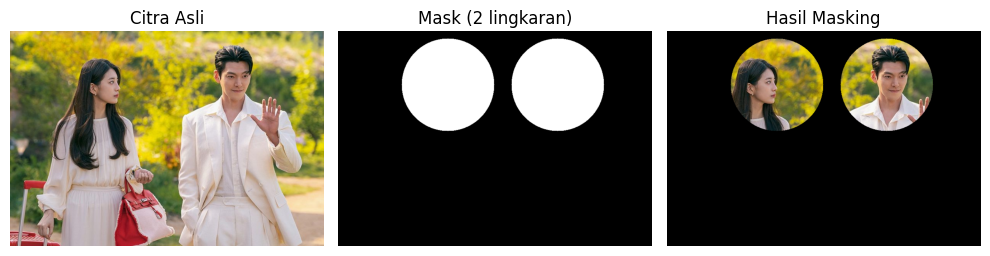

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# === 1. Baca gambar asli ===
img_path = '/content/drive/MyDrive/Image PCVK/couple.jpg'  # Ganti sesuai lokasi file kamu
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("File 'couple.jpg' tidak ditemukan. Pastikan path benar.")

# === 2. Buat mask hitam dengan ukuran sama seperti gambar ===
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# === 3. Gambar dua lingkaran putih di mask ===
# Titik pusat dan radius bisa disesuaikan
height, width = mask.shape
cv2.circle(mask, (int(width * 0.35), int(height * 0.25)), 120, 255, -1)
cv2.circle(mask, (int(width * 0.7), int(height * 0.25)), 120, 255, -1)

# === 4. Terapkan mask ke gambar ===
masked = cv2.bitwise_and(img, img, mask=mask)

# === 5. Tampilkan hasil ===
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Mask (2 lingkaran)')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Hasil Masking')
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

**5. Lakukan percobaan menggunakan operator lain**

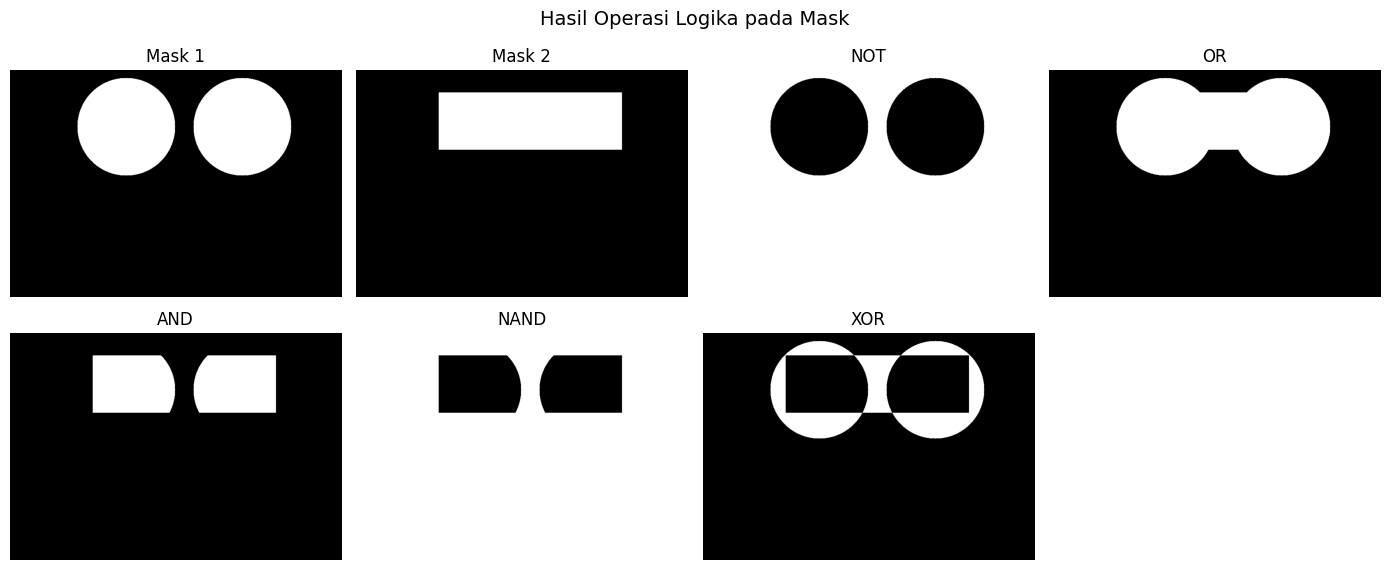

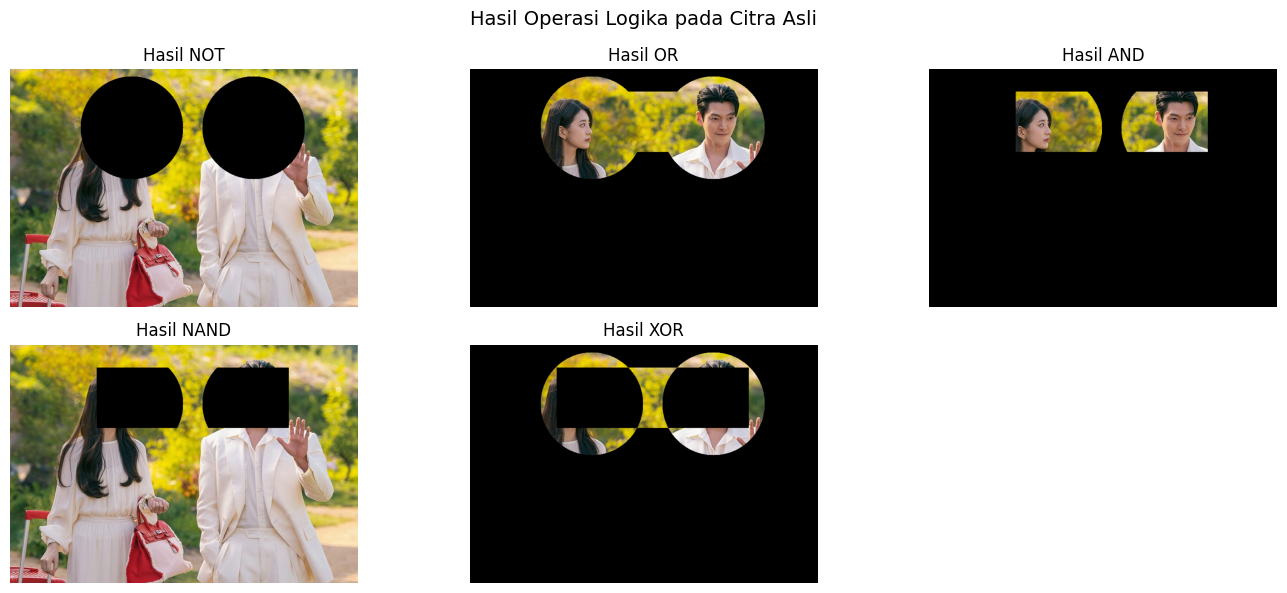

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# === 1. Baca gambar asli (boleh pakai yang sama dengan soal 4) ===
img_path = '/content/drive/MyDrive/Image PCVK/couple.jpg'  # Ganti sesuai lokasi file kamu
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("File 'couple.jpg' tidak ditemukan. Pastikan path benar.")

# === 2. Buat dua mask berbeda untuk percobaan ===
height, width = img.shape[:2]
mask1 = np.zeros((height, width), dtype=np.uint8)
mask2 = np.zeros((height, width), dtype=np.uint8)

# Mask pertama: dua lingkaran (seperti soal 4)
cv2.circle(mask1, (int(width * 0.35), int(height * 0.25)), 120, 255, -1)
cv2.circle(mask1, (int(width * 0.7), int(height * 0.25)), 120, 255, -1)

# Mask kedua: persegi panjang di tengah
cv2.rectangle(mask2, (int(width * 0.25), int(height * 0.1)), (int(width * 0.8), int(height * 0.35)), 255, -1)

# === 3. Lakukan operasi logika pada mask ===
mask_not = cv2.bitwise_not(mask1)             # NOT
mask_or = cv2.bitwise_or(mask1, mask2)        # OR
mask_and = cv2.bitwise_and(mask1, mask2)      # AND
mask_nand = cv2.bitwise_not(mask_and)         # NAND
mask_xor = cv2.bitwise_xor(mask1, mask2)      # XOR

# === 4. Terapkan mask hasil operasi pada gambar asli ===
img_not = cv2.bitwise_and(img, img, mask=mask_not)
img_or = cv2.bitwise_and(img, img, mask=mask_or)
img_and = cv2.bitwise_and(img, img, mask=mask_and)
img_nand = cv2.bitwise_and(img, img, mask=mask_nand)
img_xor = cv2.bitwise_and(img, img, mask=mask_xor)

# === 5. Tampilkan semua hasil Mask (hitam putih) ===
titles_mask = ['Mask 1', 'Mask 2', 'NOT', 'OR', 'AND', 'NAND', 'XOR']
images_mask = [mask1, mask2, mask_not, mask_or, mask_and, mask_nand, mask_xor]

plt.figure(figsize=(14,6))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(images_mask[i], cmap='gray')
    plt.title(titles_mask[i])
    plt.axis('off')
plt.suptitle('Hasil Operasi Logika pada Mask', fontsize=14)
plt.tight_layout()
plt.show()

# === 6. Tampilkan hasil penerapan Mask pada gambar asli ===
titles_img = ['NOT', 'OR', 'AND', 'NAND', 'XOR']
images_img = [img_not, img_or, img_and, img_nand, img_xor]

plt.figure(figsize=(14,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(images_img[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Hasil {titles_img[i]}')
    plt.axis('off')
plt.suptitle('Hasil Operasi Logika pada Citra Asli', fontsize=14)
plt.tight_layout()
plt.show()

# Analisis:
**Mask 1** = Dua lingkaran putih di atas background hitam. Mask dasar (bagian putih = area aktif)

**Mask 2** = Persegi panjang putih di tengah atas. Mask kedua untuk operasi logika

**NOT** = Warna hitam ↔ putih (lingkaran jadi hitam, latar jadi putih). bitwise_not() membalik setiap bit (0-255, 255-0)

**OR** = Gabungan area putih dari kedua mask (lingkaran + persegi menyatu). bitwise_or() memberi 1 jika salah satu bernilai 1

**AND** = Hanya bagian irisan (perpotongan lingkaran dan persegi) yang putih. bitwise_and() hanya memberi 1 jika keduanya bernilai 1

**NAND** = Semua area kecuali hasil AND yang menjadi putih. bitwise_not(AND)

**XOR** = Area yang berbeda dari dua mask berwarna putih (non-overlap). bitwise_xor() memberi 1 hanya jika bit berbeda


# Kesimpulan:
- Operator NOT menghasilkan citra komplemen (membalik nilai piksel).

- Operator OR menggabungkan dua area terang dari mask berbeda.

- Operator AND hanya menampilkan bagian yang tumpang tindih dari dua mask.

- Operator NAND merupakan kebalikan dari AND, menampilkan area selain tumpang tindih.

- Operator XOR menampilkan area yang berbeda dari kedua mask (tidak beririsan).